In [1]:
#import the basic libraries

from datetime import datetime
from dateutil import parser
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [2]:
#read data

data = pd.read_excel("C:/my_raceTecResults.xlsx")
data.head()

,event_date,event_name,distance_km,my_race_time,my_avg_speed_kph,my_start_group,winners_time,winners_avg_speed_kph
0,10/10/2021,Cape Town Cycle Tour,109.0,02:56:26,37.07,1,02:37:11,41.61
1,23/05/2021,Tshwane Classic,90.0,02:22:08,37.99,1,01:58:50,45.44
2,08/03/2020,Cape Town Cycle Tour,109.0,03:01:05,36.12,4,02:30:04,43.58
3,22/02/2020,Takealot Berge en Dale,109.0,03:45:59,28.94,4,02:34:24,42.36
4,16/02/2020,Dis Chem Ride for Sight,116.0,03:07:13,37.18,2,02:34:14,45.13


In [3]:
#get a feel for the data

data.describe()

,distance_km,my_avg_speed_kph,my_start_group,winners_avg_speed_kph
count,144.000000,144.000000,144.000000,144.000000
mean,101.326389,31.880069,7.819444,40.110833
std,28.609214,3.760671,6.391267,2.349913
min,40.000000,22.020000,1.000000,33.250000
25%,85.000000,28.752500,3.000000,38.662500
50%,97.000000,32.625000,6.000000,39.975000
75%,109.000000,34.830000,11.000000,41.617500
max,202.000000,39.990000,26.000000,46.570000


In [4]:
data = pd.read_excel("C:/Users/my_raceTecResults.xlsx",
                          index_col = "event_date" , parse_dates = True)
data_date = data.groupby("event_date").mean()
data_date

,distance_km,my_avg_speed_kph,my_start_group,winners_avg_speed_kph
event_date,,,,
2005-04-12,71.0,28.15,26.0,35.48
2005-10-22,44.0,28.78,26.0,38.61
2005-10-30,40.0,29.51,26.0,38.37
2005-11-12,72.0,24.88,22.0,33.25
2006-01-28,80.0,24.24,26.0,41.78
...,...,...,...,...
2020-02-16,116.0,37.18,2.0,45.13
2020-02-22,109.0,28.94,4.0,42.36
2020-08-03,109.0,36.12,4.0,43.58


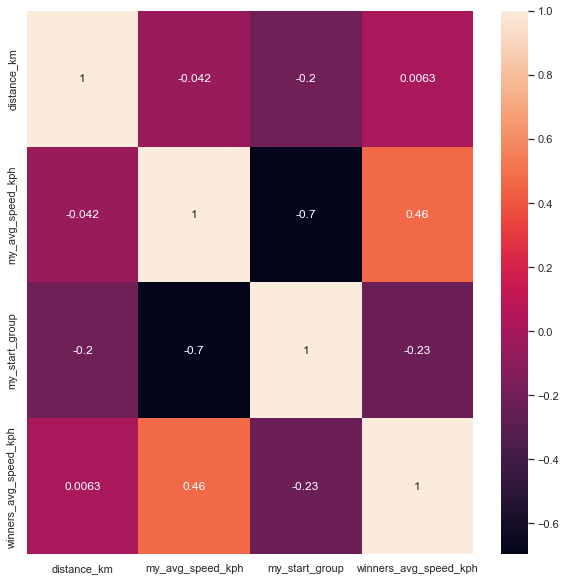

In [5]:
#using heatmap to see the correlation between features

plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

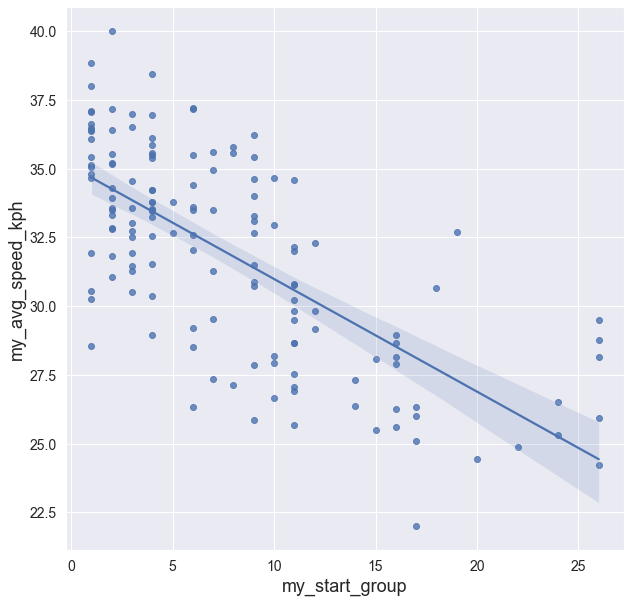

In [6]:
#regression plot. my average speed vs the group I'm in 

plt.figure(figsize = (10, 10))
plt.xlabel("my_start_group", fontsize = 18)
plt.ylabel("my_avg_speed_kph", fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.regplot(x = "my_start_group", y = "my_avg_speed_kph", data = data);

In [7]:
#remove my_start_group. regroup data and draw a plot

data.drop("my_start_group", axis = 1, inplace = True)
data1 = data.groupby("event_name").mean()
data1.head()

,distance_km,my_avg_speed_kph,winners_avg_speed_kph
event_name,,,
99er Cycle Tour,106.285714,34.142857,39.760000
Bay City Cycle Race,84.000000,29.525000,37.255000
Boland Drukpers Funride,100.000000,28.200000,39.100000
Bouckaert Soenen Cycle Tour,118.000000,32.384545,39.876364
Cape Town Cycle Tour,102.600000,32.146000,41.551333


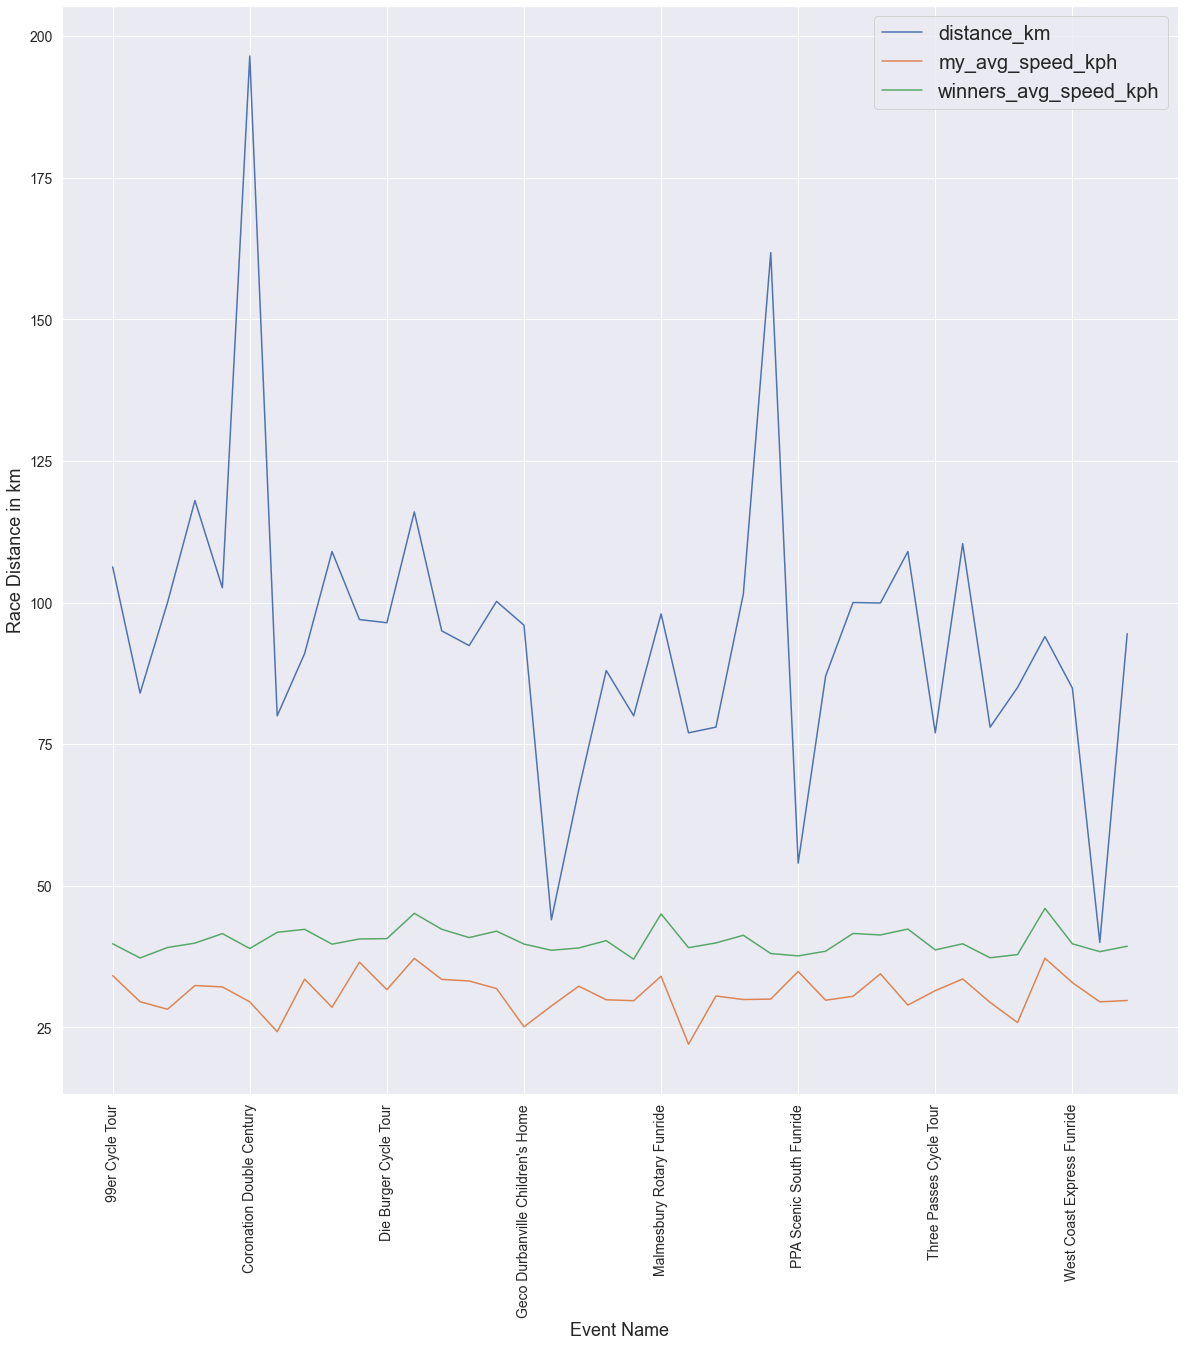

In [13]:
#Visualizing the data

data1.plot(figsize = (20, 20))
plt.xticks(fontsize = 14, rotation = 90)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 20)
plt.xlabel('Event Name', fontsize=18)
plt.ylabel("Race Distance in km", fontsize = 18);